# Cluster wines to find interesting patterns using k-means in Python
------------
This work is part of a collection of practice sets called [Machine Learning Starter](https://github.com/jamiemorales/project-machine-learning-starter).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the machine learning lifecycle early on.
After completion, someone will have built intuition over the machine learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to find strong and interesting patterns or similarities from a red wine dataset.

## Step 1: Set-up and understand data
This step helps uncover issues that we will want to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [4]:
# Set-up libraries
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Read-in data
df = pd.read_csv('../00-Datasets/winequality-red.csv')

In [151]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [152]:
# Look at some records
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [153]:
# Check for missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [154]:
# Check for duplicate values
df.duplicated().sum()

240

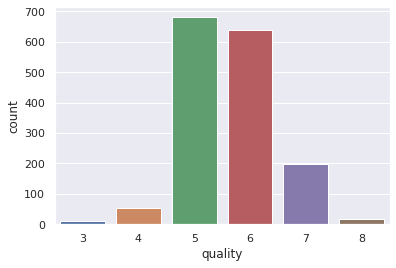

In [155]:
# Look at breakdown of Gender
df['quality'].value_counts()
sns.countplot(df['quality'])

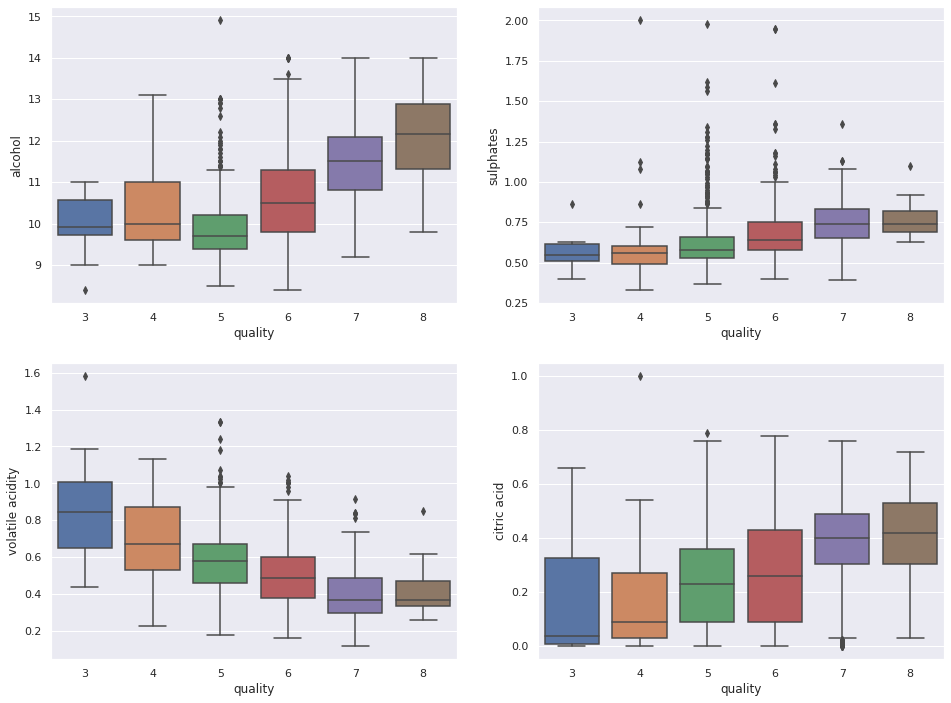

In [156]:
# Explore data visually with boxplots
f, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot('quality', 'alcohol', data=df, ax=ax[0, 0])
sns.boxplot('quality', 'sulphates', data=df, ax=ax[0, 1])
sns.boxplot('quality', 'volatile acidity', data=df, ax=ax[1, 0])
sns.boxplot('quality', 'citric acid', data=df, ax=ax[1,1])

In [157]:
# Explore correlation of other features to quality
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [158]:
# Summarise
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Step 2: Preprocess data and understand some more
This step typically takes the most time in the cycle but for our purposes, most of the datasets chosen in this series are clean.

Real-world datasets are noisy and incomplete. The choices we make in this step to address data issues can impact downstream steps and the result itself. For example, it can be tricky to address missing data when we don't know why it's missing. Is it missing completely at random or not? It can also be tricky to address outliers if we do not understand the domain and problem context enough.

In [159]:
# Get the features for input
X = df.drop('quality', axis=1)

In [160]:
# Scale the values
X_scaled = StandardScaler().fit_transform(X)

## Step 3: Model and evaluate

We need to create a number of models with different k values, measure the performance of each model, and use the k with the best performance in our final model. 

Where the ground truth is available, we compare the clusters generated to that of the ground truth.

In [161]:
# Build and fit models
wcss_scores = []
iterations = list(range(1,10))

for k in iterations:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    wcss_scores.append(model.inertia_)

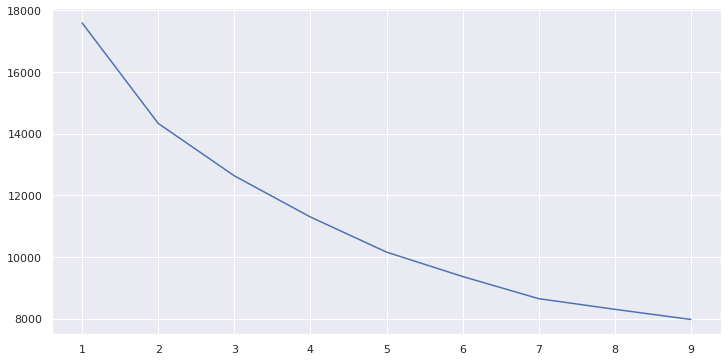

In [162]:
# Plot performances
plt.figure(figsize=(12,6))
sns.lineplot(iterations, wcss_scores)

There are dips at 2, 5, and 7. Let's plot some features and see what's going on.

Text(0.5, 0.92, 'K=2: Acidity, Sugar, Alcohol')

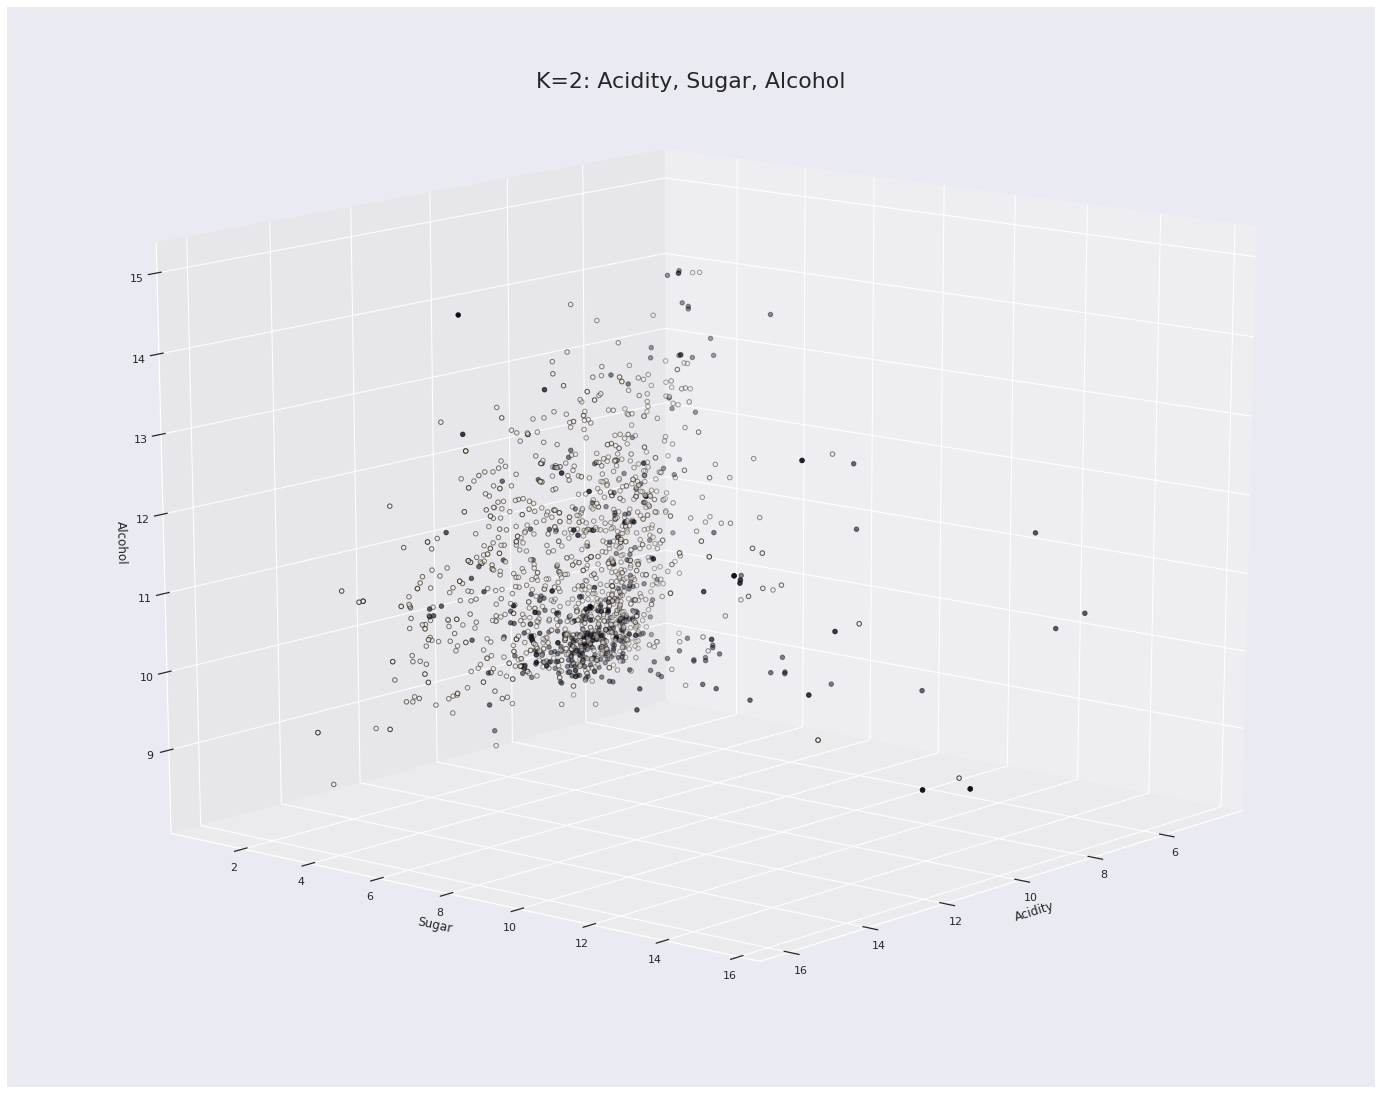

In [186]:
# Visualise the clusterds considerig fixed acidity, residual sugar, and alcohol
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)
model = KMeans(n_clusters=2)
model.fit(X)
labels = model.labels_
ax.scatter(X['fixed acidity'], X['residual sugar'], X['alcohol'],c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=2: Acidity, Sugar, Alcohol', size=22)

We can somewhat see a dark clump at the bottom there, all with relatively lower fixed acidity, residual sugar, and alcohol. This can be interesting, or not at all. But let's see the others first. Will increasing the number of clusters shed more light?

Text(0.5, 0.92, 'K=5: Acidity, Sugar, Alcohol')

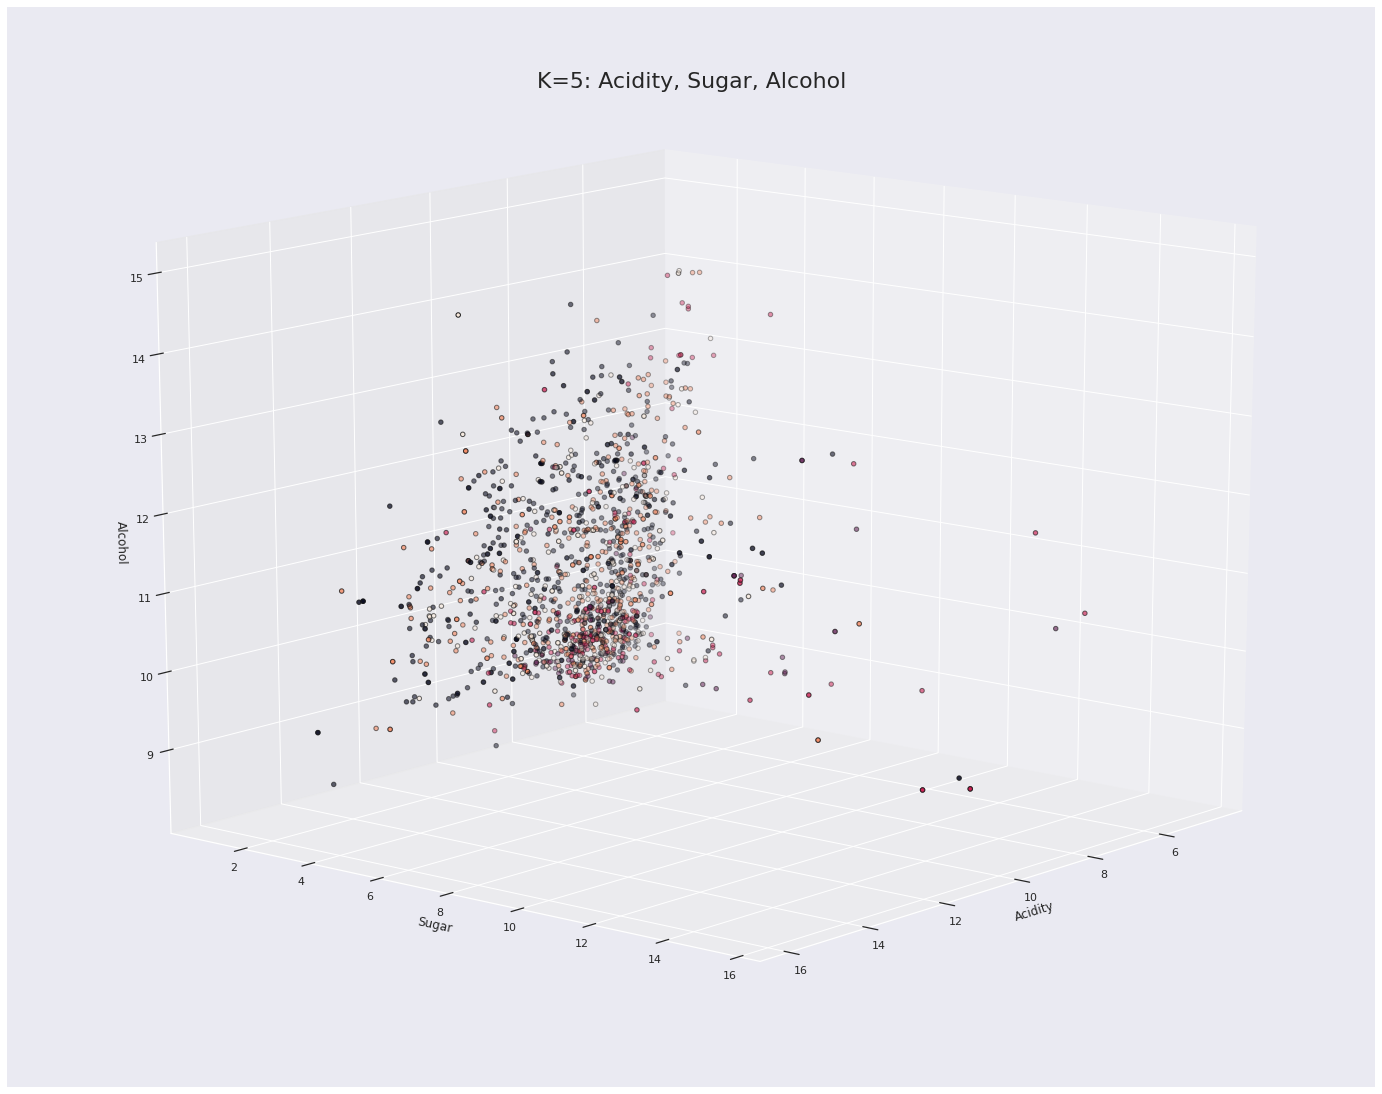

In [187]:
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)
model = KMeans(n_clusters=5)
model.fit(X)
labels = model.labels_
ax.scatter(X['fixed acidity'], X['residual sugar'], X['alcohol'],c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=5: Acidity, Sugar, Alcohol', size=22)

Text(0.5, 0.92, 'K=7: Acidity, Sugar, Alcohol')

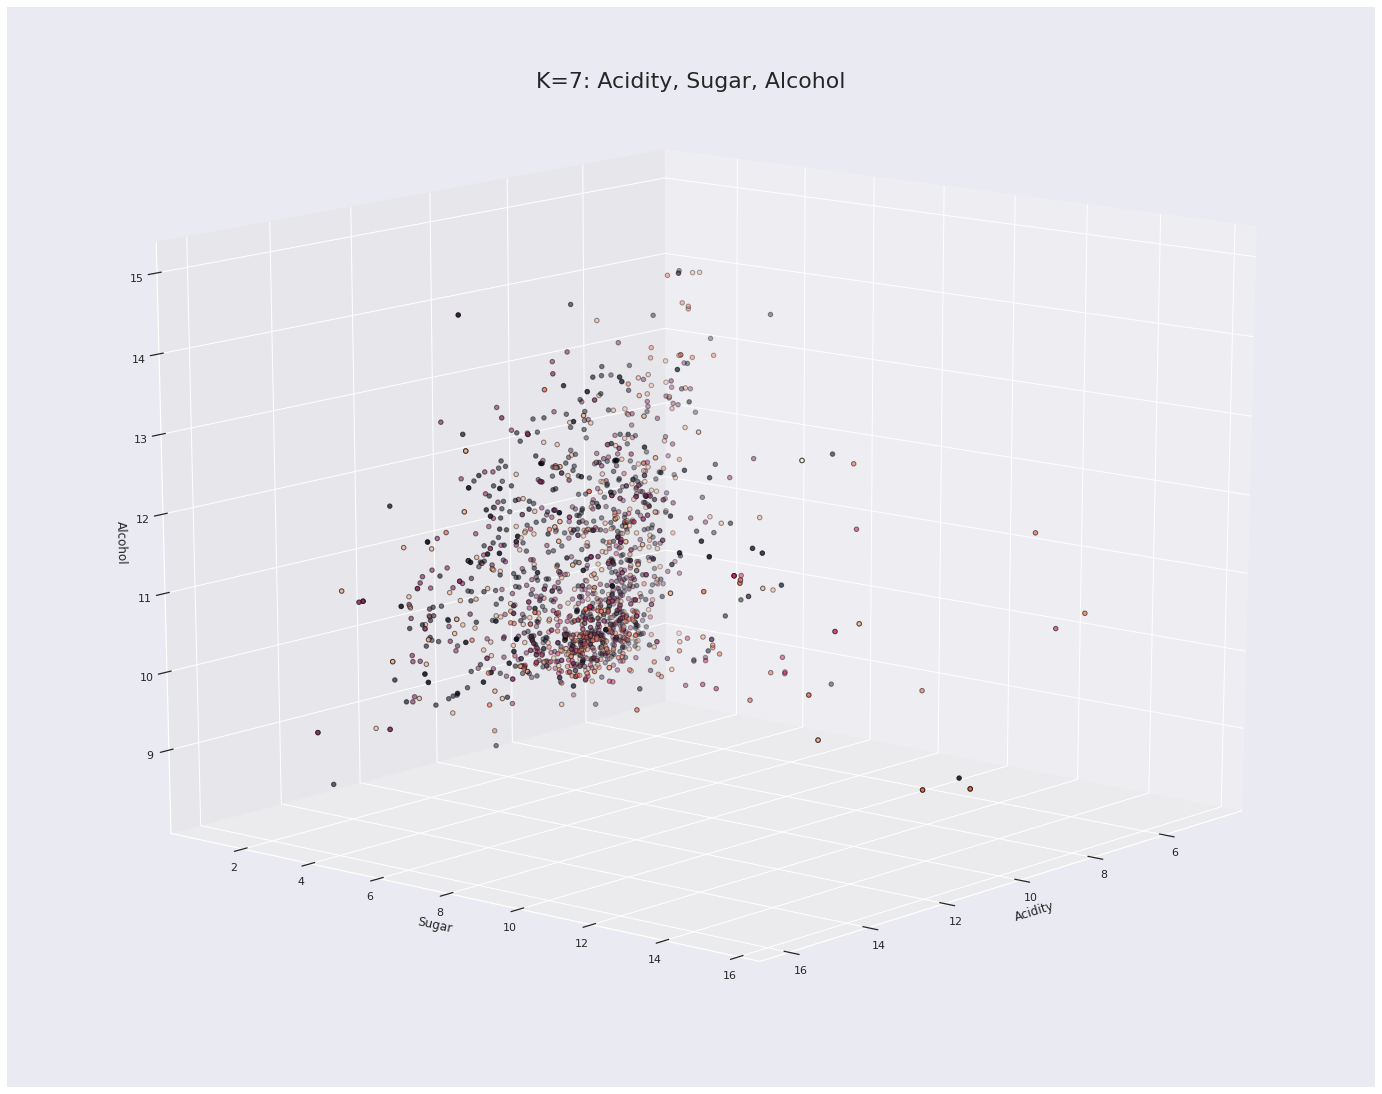

In [188]:
# Visualise the clusterds considerig fixed acidity, residual sugar, and alcohol
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)
model = KMeans(n_clusters=7)
model.fit(X)
labels = model.labels_
ax.scatter(X['fixed acidity'], X['residual sugar'], X['alcohol'],c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=7: Acidity, Sugar, Alcohol', size=22)

Let's go back to K=2 as it's more curious than the last two k's. How does it compare to the ground truth?

Text(0.5, 0.92, 'Ground truth')

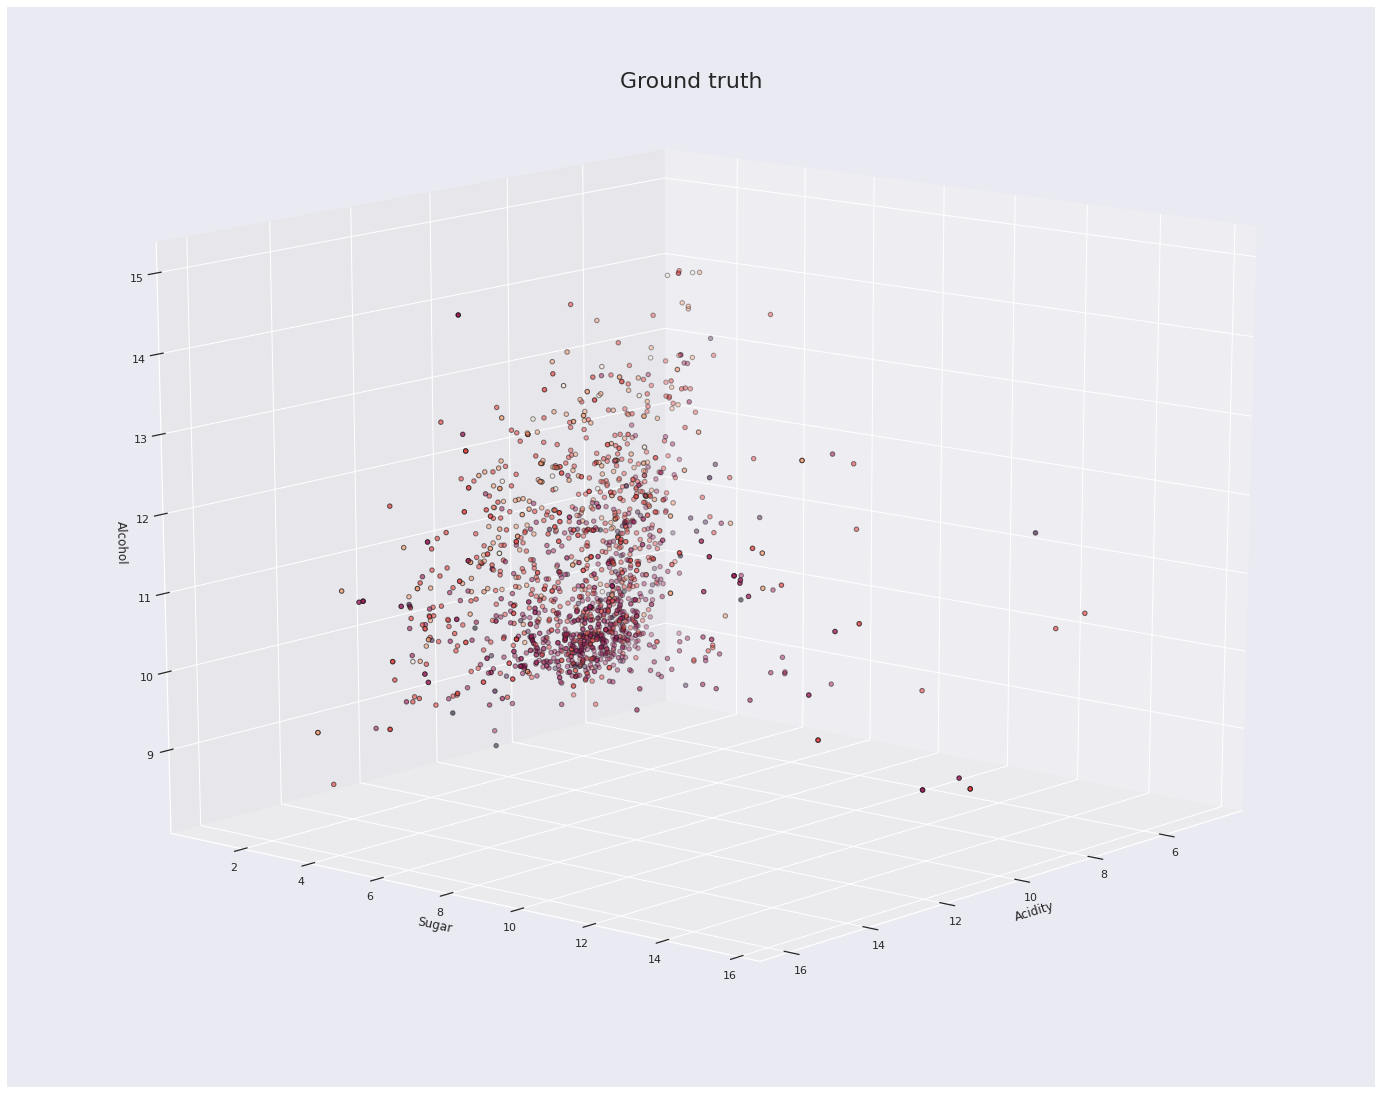

In [191]:
# Compare clusters generated to the ground truth
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)
ax.scatter(df['fixed acidity'], df['residual sugar'], df['alcohol'],c=df['quality'], edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('Ground truth', size=22)

Text(0.5, 0.92, 'K=2: Acidity, Sugar, Alcohol')

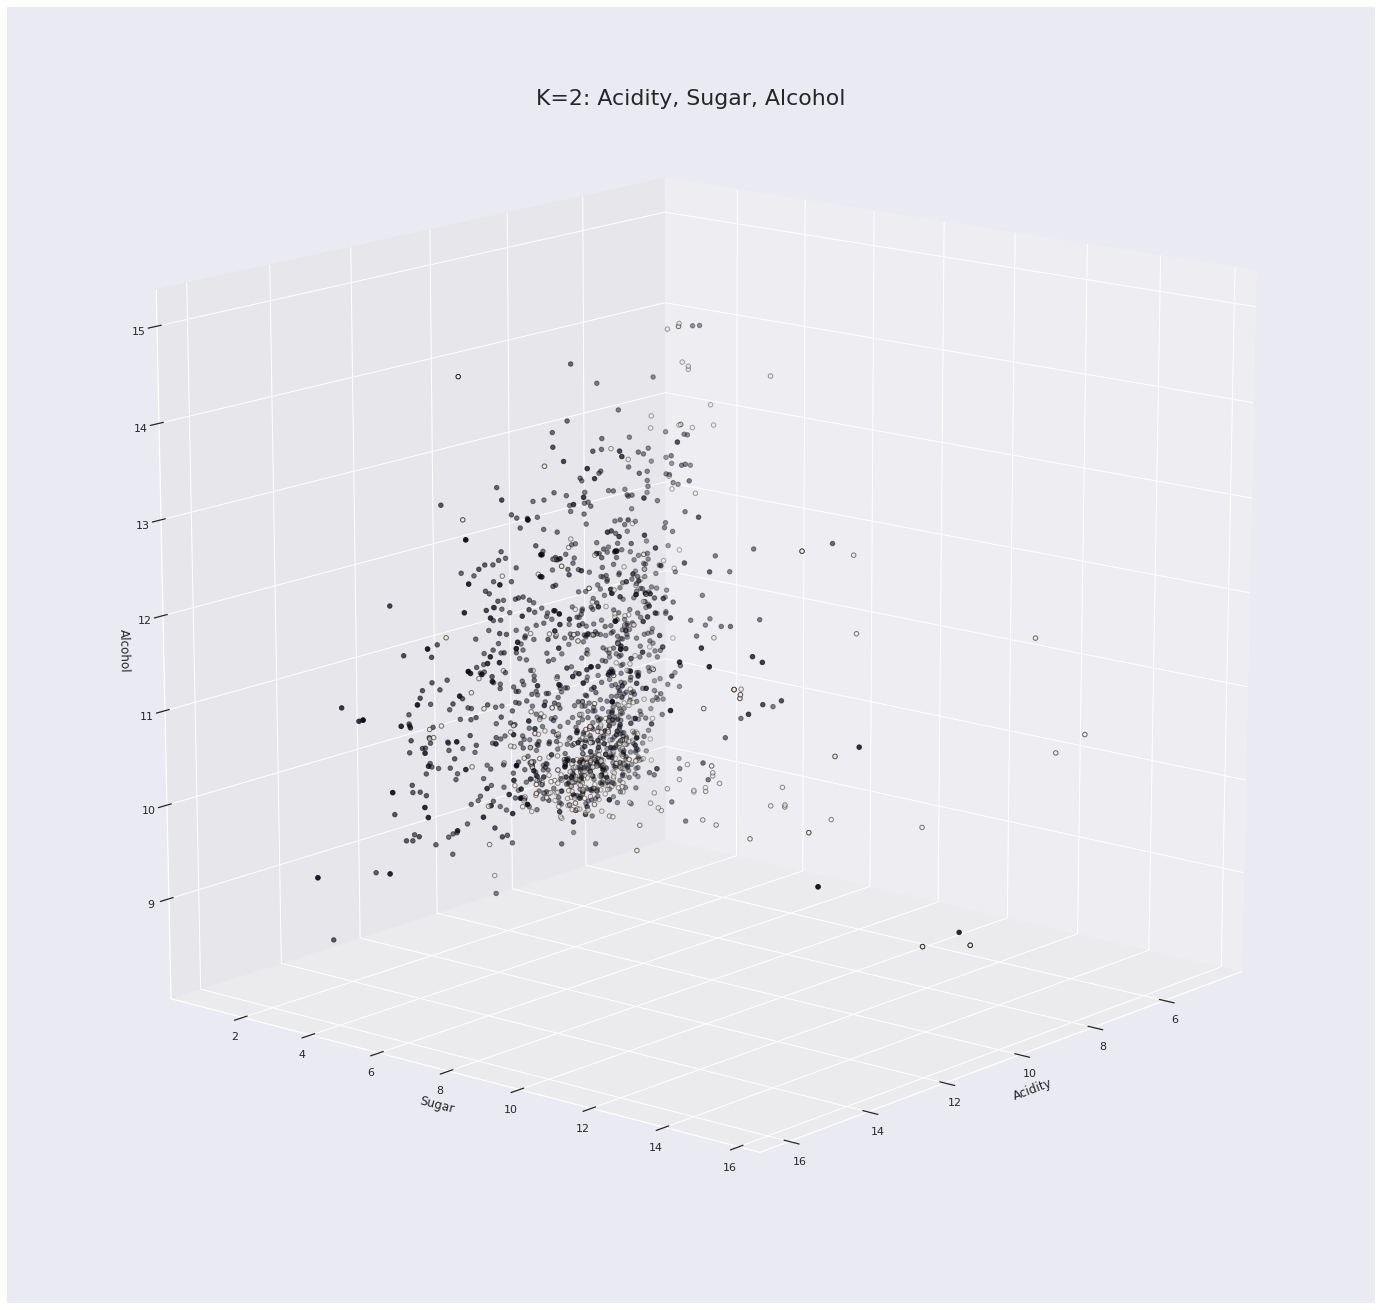

In [168]:
# Visualise the clusterds considerig fixed acidity, residual sugar, and alcohol
fig = plt.figure(figsize=(20, 18))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)
model = KMeans(n_clusters=2)
model.fit(X)
labels = model.labels_
ax.scatter(X['fixed acidity'], X['residual sugar'], X['alcohol'],c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=2: Acidity, Sugar, Alcohol', size=22)

Text(0.5, 0.92, 'Ground truth: Low to average quality wine')

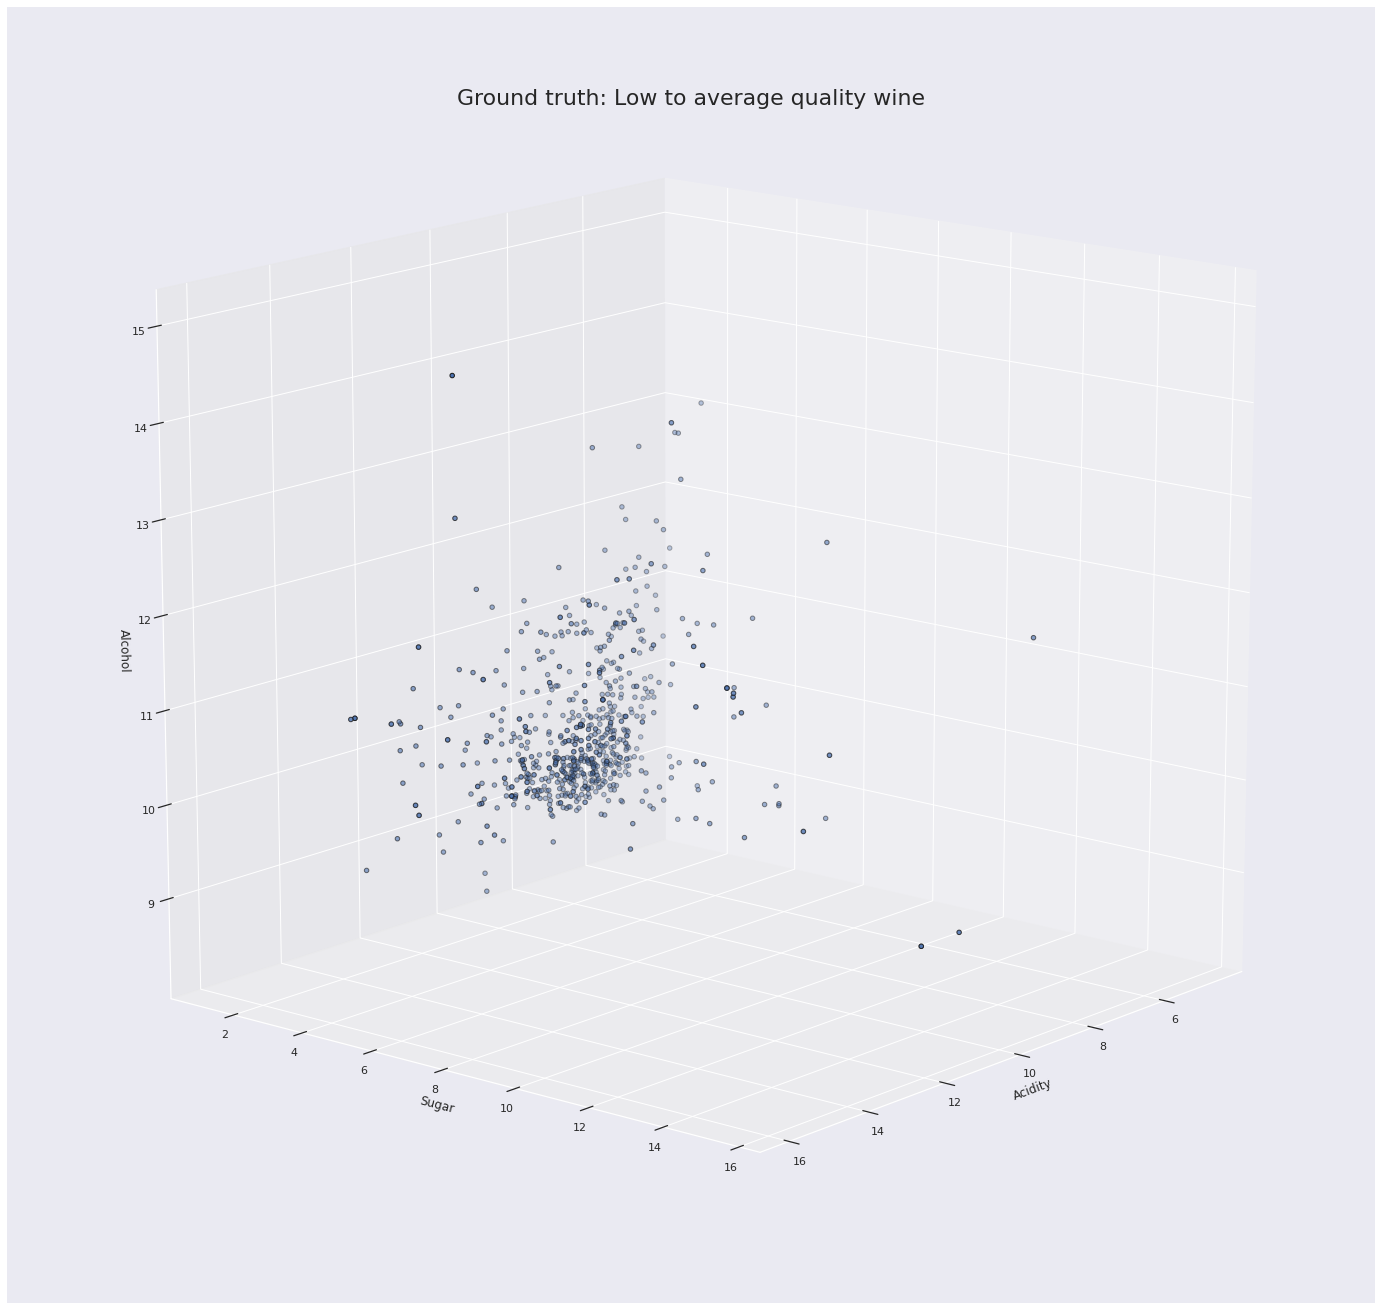

In [192]:
# Compare generated cluster with ground truth
fig = plt.figure(figsize=(20, 18))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)
ax.scatter(df['fixed acidity'][df['quality']<6], 
           df['residual sugar'][df['quality']<6], 
           df['alcohol'][df['quality']<6],
           edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('Ground truth: Low to average quality wine', size=22)

Text(0.5, 0.92, 'Ground truth: High quality wine')

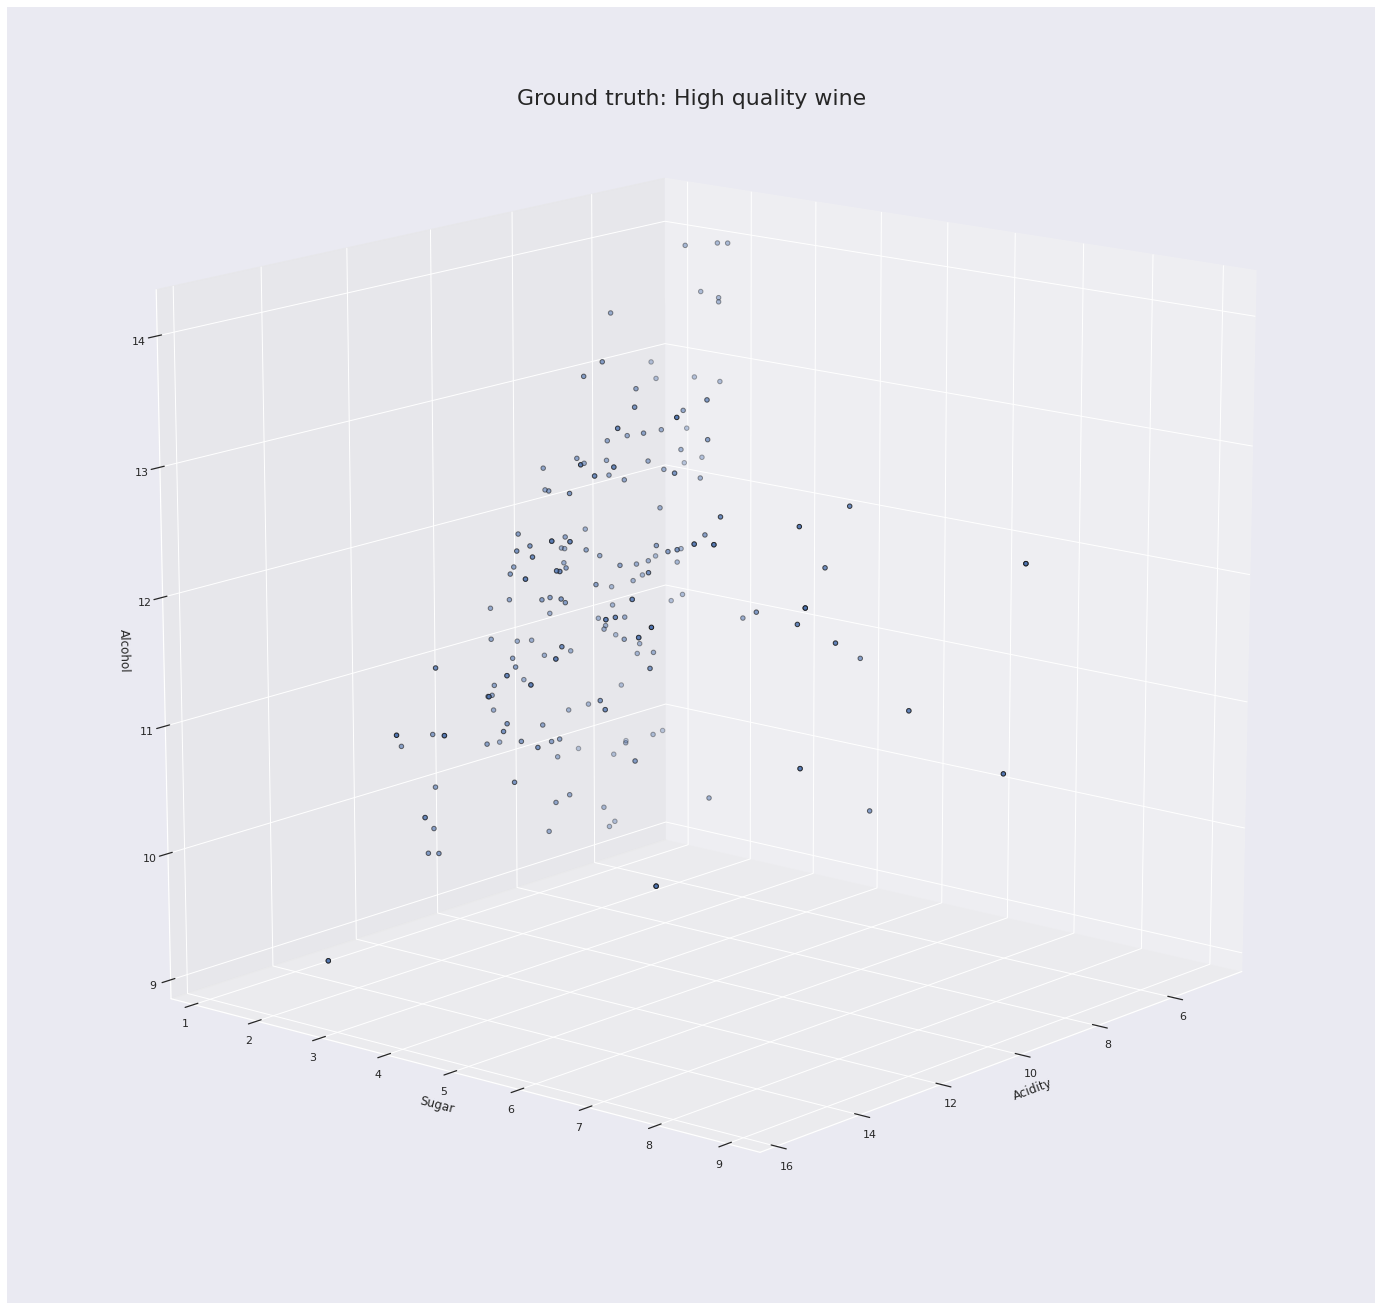

In [170]:
# Visualise the clusterds considerig fixed acidity, residual sugar, and alcohol
fig = plt.figure(figsize=(20, 18))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)
ax.scatter(df['fixed acidity'][df['quality']>6], 
           df['residual sugar'][df['quality']>6], 
           df['alcohol'][df['quality']>6],
           edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('Ground truth: High quality wine', size=22)

It turns out there are two curious clusters of wine quality based on fixed acidity, residual sugar, and alcohol level.

Low to average quality wine that may be lower in fixed acidity, residual sugar, and alcohol level. High quality wine that may have higher fixed acidity, residual sugar, and alcohol level.


## More

If you found this work interesting, you might like:

* Machine Learning Starter

* Deep Learning Starter

* Natural Language Processing Starter

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [datasets and sources](https://github.com/jamiemorales/project-machine-learning-starter/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/